In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

#Endogeneity

We use the term **endogeneity** to describe situations in which $COV(X,\epsilon) = 0$. The existence of endogeneity is often difficult to test statistically as we have seen in the specific case of **simultaneity** in supply and demand systems. The fact that endogeneity is difficult to test statistically, and often appears in human systems, has led economists to develop the tools and theory with which we confront endogeneity. This focus is one of the defining characterisitic of econometrics relative to other fields in data science. If we have reason to believe that independent variables are correlated with the error term in the population then we refer to these as **endogenous variables** or **endogenous regressors**. Independent variables that we do not believe are correlated with the error term are **exogenous variables**.

Endogenous regressors may appear for a variety of reasons:

##Examples of Endogeneity Problems

*   **Omitted Variables**. Consider the regression model
\begin{equation}
\ln{G} = \beta_0 + \beta_1\ln{Price} + \beta_2 \ln{Income} + \epsilon
\end{equation}

where $\ln{G}$ is logged gasoline consumption, $\ln{Price}$ is logged gasoline price, and $\ln{Income}$ is logged personal income. If this were an accurate representation of the population model, but an analyst assumed the model
\begin{equation}
\ln{G} = \beta_0 + \beta_1\ln{Price} + \omega
\end{equation}
then we have $\omega = \beta_2\ln{Income} + \epsilon$, and if $\ln{Price}$ is correlated with $\ln{Income}$, then $COV(\ln{Price},\omega) \neq 0$, and we have an endogeneity issue referred to as **omitted variable bias** which we've seen before. Intuitively, if the omitted variable is correlated with both the dependent variable and an independent variable then we will have biased estimates from OLS in this case. We can intuitively predict the direction of this bias in some cases. For example, what if we ran a regression with house price as the dependent variable and number of bedrooms as the independent variable, but we did not control for size of house (square footage).


*   **Endogenous Treatment Effects**

Consider an attempt to estimate the **treatement effect** of going to an elite college using
\begin{equation}
\ln{y} = \pmb{x}'\beta + \delta T + \epsilon
\end{equation}
where $\pmb{x}$ is a matrix of control variable and an intercept, while $T$ is a catergorical variable equal to one if an individual attended an elite college and is otherwise 0. $\delta$ is the population treatment effect of attending an elite college to be estimated. However, some unobserved or even unmeasurable determinants that impact earnings, e.g., ambition, and also impact the probability that an individual attends an elite university. This fact motivates the use of **natural experiments** - situations in which individuals are randomly selected into the treatment group - among other methods. Example: John Snow Cholera experiment in London (1864).

* **Simultaneous Equations (Simultaneity)**

Consider estimating the parameters of a supply (or demand) curve using data collected on only price and quantity.

* **Dynamic Panel Data Models**

Panel data varies but space ($i$) and tie ($t$). Consider the dynamic **random effects** model
\begin{equation}
y_{it} = \pmb{x'}_{it}\beta + \gamma y_{i,t-1} + \epsilon_{it} + u_i
\end{equation}
where $u_i$ contains the time-invariant unobserved features of individual $i$. The error term this case is $\epsilon_{it} + u_i$. The unobserved heterogeneity represented by $u_i$ impacts $y_{it}$ in every period: a large $u_i$ will lead to a larger $y_{i,t-1}$ and vice versa so $COV(y_{i,t-1}, \epsilon_{it} + u_i) \neq 0$.

* **Measurement Error**

Consider a population regression that posits a simple relationship between earnings ($y_{it}$) and education:
\begin{equation}
y_{it} = \beta_0 + \beta_1 Education_{it} + \epsilon_{it}.
\end{equation}
Education is inherently difficult to measure. We often use years of schooling as a proxy. Implicitly, we are saying something like
\begin{equation}
Schooling_{it} = Eduation_{it} + u_{it}
\end{equation}
where $u_{it}$ represents measurement error to the extent we don't believe the proxy is perfect. Substitution gives
\begin{equation}
y_{it} = \beta_0 + \beta_! Schooling_{it} + w_{it}
\end{equation}
where $w_{it} = \epsilon_{it} -\beta_2u_{it}$, so $COV(Schooling_{it}, w_{it}) \neq 0$ and we have an endogeneoty issue.

##Solutions to Endogeneity Issues



*   **Structural Modeling**

Structural modeling usually involves developing a more detailed theoretical model of the system. These often involve specifying equations that explain correlation between endogenous regressor and the error term in a manner that allows estimation of all relevant parameters.

*   **Instrumental Variable Estimation**

Suppose we have a model in which up to $K$ independent variables, $\pmb{x}_i$, are correlated with the error term. Suppose further than their exists a set of $L$ variables, $\pmb{z}_i$, such that $\pmb{z}_i$ is correlated with $\pmb{x}_i$, but not with $\epsilon_i$. We can't use standard OLS with $\pmb{x}_i$ but can exploit that $\pmb{z}_i$ is correlated with $\pmb{x}_i$ but not with $\epsilon_i$ to **consistently** estimate the population coefficients. The set of variables $\pmb{z}_i$ are the **instrumental variables** or **instruments**, and such methods are broadly referred to as **instrumental variable estimation**.

A class of extensions of instrumental variable estimation maps a set of endogenous regressors to a set of exogenous regressors via a control function. For example, in **two-stage least squares**, the exogenous regressors are regressed against a set of exogenous variables, then the predicted values from that *first stage* are used in place of the endogenous regressors in the main model in the *second stage*.

##Impact of Endogeneity

The least squares estimator is biased:

\begin{equation}
E[b|X] = \beta + (X'X)^{-1}X'COV(X, \epsilon) \neq \beta.
\end{equation}

The least squares estimator is also not **consistent**: this means the bias does not disappear even with large samples. Least squares is an **inconsistent** estimator in the presence of endogeneity. This bias and inconsistency resulting from endogeneity is not limited to estimation of coefficieints on endogeneous regressors. This bias spillover to other coefficieint estimates in the model is known as **smearing**.

##The Instrumental Variables Estimator

Assume we seek to estimate

\begin{equation}
y = X\beta + \epsilon
\end{equation}

but think that some of the variables in $X$ are endogenous. Assume we have another set of variables $Z$ with the same number of variables as $X$. $Z$ includes the exogenous variables from $X$ plus **exogenous instruments** for the engoenous variables in $X$. The instruments need to meet two critical conditions:


*   **Relevance**: They are correlated with the endogenous variables, $X$
*   **Exogeneity**: They are uncorrelated with $\epsilon$

The former is testable while the latter is extremely difficult to test and generally amounts to theory. Given we've identified a set for $Z$ that meets these characteristics, the **instumental variable estimator** is

\begin{equation}
b_{IV} = (Z'X)^{-1}Z'y
\end{equation}

For a bivariate regression model with a constant term, this simplifies to

\begin{equation}
b_{IV} = \frac{\sum_i(z_i-\bar{z})(y_i - \bar{y})}{\sum_i(z_i-\bar{z})(x_i-\bar{x})} = \frac{COV(y,z)}{COV(x,z)}
\end{equation}

It can be shown that $E[b_{IV}] = \beta$ if the relevance and exogeneity assumptions are satisfied. The IV estimator essentially isolates exogenous variation in $X$, i.e., that variation which is related to $Z$, and uses that exogeneous variation in $X$ to estimate the relationship between $X$ and $y$. The IV estimator only works if we have **exact identification** which means the number of instruments is the same as the number of expected endogenous independent variables in $X$. If we have an **overidentified** model, where there are more instruments than endogenous regressors, we need a different technique. Overidentification can be valuable if we only have access to **weak instruments**: the exogenous variables are only weakly correlated with the endogenous regressors so using information from multiple instruments can add valuable information to the model.

##Two-Stage Least Squares

Consider the following linear regression system

\begin{align}
\text{(Demand)}&\;\;\; Quantity_D = \alpha_0 + \alpha_1 Price + \alpha_2 Income + \epsilon_D\\
\text{(Supply)}&\;\;\; Quantity_S = \beta_0 + \beta_1 Price + \beta_2 InputPrice + \beta_3Rainfall +\epsilon_S \\
\text{(Equilibrium)}& \;\;\; Quantity_D = Quantity_S
\end{align}

\begin{align}
\text{(Demand)}&\;\;\; QuantityLoans_D = \alpha_0 + \alpha_1 InterestRate + \alpha_2 Profit + \epsilon_D\\
\text{(Supply)}&\;\;\; QuantityLoans_S = \beta_0 + \beta_1 InterestRate + \beta_2 FederalFundsRate  +\epsilon_S \\
\text{(Equilibrium)}& \;\;\; QuantityLoans_D = QuantityLoans_S
\end{align}

for an agricultural commodity market. Price is clearly an endogenous variable in both equations. Input Price and Rainfall are both plusibly exogenous supply shifts that could be used to **identify** the parameters of the demand equation. We assume Income is exogenous. We could apply the instrumental variable if we chose one of the two exogenous supply shifters as out instrument. However, we would be leaving valuable variation associated with the other instrument on the table.

We can write the full matrix $Z = (1,Income, InputPrice, Rainfall)$ but this has too many variables relative to the demand equation independent variables so we have an over-idetified system.**Two-Stage Least Squares (2SLS)** provides a method for extracting all of the useful exogenous information out of an overidentified system.

If $Z$ contains more variables than $X$, then $Z'X$ is not square and thus not invertible, so we need to new estimator to extract all the information from our instruments. 2SLS and similar estimators make use of the fact that if $z_1$ and $z_2$ are both valid instruments for some endogenous regressor $x_1$, then any linear combination of them, $z^* = z_1+z_2$, is also a valid instrument. Relatedly, if each instrument is uncorrelated with $\epsilon$ then any linear combination of instruments is also uncorrelated with $\epsilon$.

The two stage least squares estimator involves **projecting** the columns of $X$ into the column space of $Z$ in the first stage. (This means estimating values of $X$ using the instruments via OLS regression.) Then using the predicted values of $X$, $\hat{\;X}$, from the first stage regression in the regression of interest in the second stage. The first stage regression is:

\begin{equation}
\hat{\;X} = Z(Z'Z)^{-1}Z'X
\end{equation}

Note that $X$ and $\hat{\;X}$ are $k \times n$ while $Z$ is $l \times n$ with $l \geq k$. The 2SLS estimator is then:

\begin{align}
b_{2SLS} &= (\hat{\:X}'X)^{-1}\hat{\;X}'y\\
&= [X'Z(Z'Z)^{-1}Z'X]^{-1}X'Z(Z'Z)^{-1}Z'y
\end{align}

In practice, analysts tend to calculate the first and second stage results seperately and to review the results from the first stage. If the first stage has a very low fit, e.g., loe R-Squared, then we might have an issue with the relevance assumption. On the other hand, if the fit is very high, then we might be violating the exogeneity assumption. The perceived validity of instruments often turns on theoretical arguments.


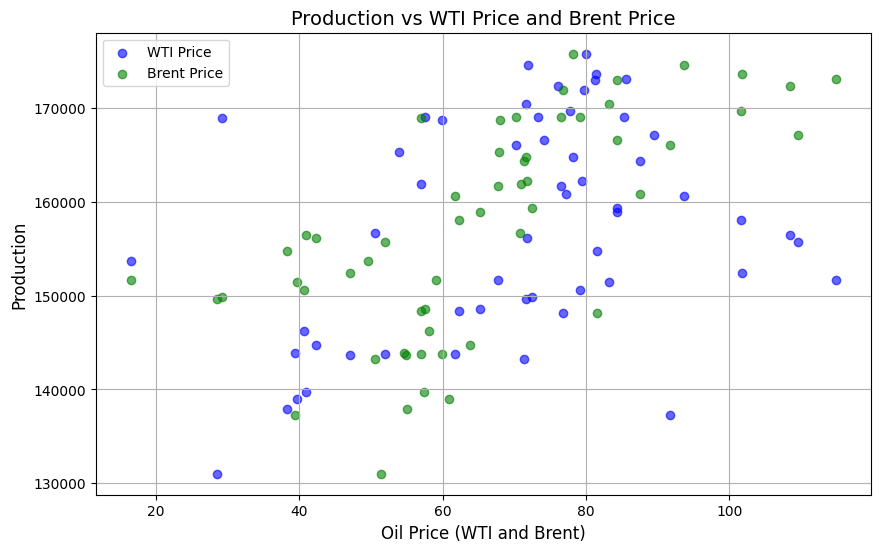

In [ ]:
# Load the CSV file
df = pd.read_csv('TX_oil_price_production_monthly.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'month' to datetime format
df['month'] = pd.to_datetime(df['month'], format='%y-%b')


# Scatter plot for WTI price vs Production
plt.figure(figsize=(10, 6))
plt.scatter(df['wti_price'], df['production'], color='blue', label='WTI Price', alpha=0.6)

# Scatter plot for Brent price vs Production
plt.scatter(df['brent_price'], df['production'], color='green', label='Brent Price', alpha=0.6)

# Add labels and title
plt.xlabel('Oil Price (WTI and Brent)', fontsize=12)
plt.ylabel('Production', fontsize=12)
plt.title('Production vs WTI Price and Brent Price', fontsize=14)

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Define the dependent and independent variables
Y = df[['production']].values  # Dependent variable: Texas oil production
X = df[['wti_price']].values  # Independent variable: (West Texas Intermediate) WTI price for OLS
Z = df[['brent_price']].values  # Instrumental variable: Brent price for IV and 2SLS - oil price in Europe - exogenous but relevance?

# Add intercept (column of ones)
X = np.hstack([np.ones((X.shape[0], 1)), X])

### OLS Regression ###
XtX_OLS = np.dot(X.T, X)  # X'X for OLS
XtY_OLS = np.dot(X.T, Y)  # X'Y for OLS
b_OLS = np.linalg.inv(XtX_OLS).dot(XtY_OLS)  # OLS coefficients

# Predicted values for OLS
Y_pred_OLS = np.dot(X, b_OLS)

# Residuals and standard errors for OLS
residuals_OLS = Y - Y_pred_OLS
sigma_squared_OLS = np.var(residuals_OLS, ddof=2)  # Variance of residuals
standard_errors_OLS = np.sqrt(np.diag(sigma_squared_OLS * np.linalg.inv(XtX_OLS)))  # Standard errors for OLS

# t-statistics for OLS
t_stats_OLS = b_OLS.flatten() / standard_errors_OLS

# p-values for OLS
df_OLS = len(Y) - X.shape[1]  # Degrees of freedom for OLS
p_values_OLS = [2 * (1 - stats.t.cdf(np.abs(t), df_OLS)) for t in t_stats_OLS]

# Print OLS results
results_OLS = pd.DataFrame({
    'Variable': ['Intercept', 'WTI Price'],
    'OLS Coefficient': b_OLS.flatten(),
    'OLS Std Error': standard_errors_OLS,
    'OLS p-value': p_values_OLS
})
print("OLS Results:")
print(results_OLS)


OLS Results:
    Variable  OLS Coefficient  OLS Std Error  OLS p-value
0  Intercept    143584.331129    5073.398100      0.00000
1  WTI Price       194.544003      69.024836      0.00673


There may be an endogeneity issue here (simultaneity) as oil production in Texas might impact the West Texas price due to simultaneity. Let's try using the European oil price as an instrument.

In [ ]:
# Add intercept to Z (instrument Brent price)
Z = np.hstack([np.ones((Z.shape[0], 1)), Z])

### IV Estimation ###
# IV Estimation: (Z'X)^(-1) Z'Y
ZtX = np.dot(Z.T, X)  # Z'X
ZtY = np.dot(Z.T, Y)  # Z'Y

# Coefficients for IV regression
b_IV = np.linalg.inv(ZtX).dot(ZtY)

# Predicted values for IV
Y_pred_IV = np.dot(X, b_IV)

# Residuals and standard errors for IV
residuals_IV = Y - Y_pred_IV
sigma_squared_IV = np.var(residuals_IV, ddof=2)  # Variance of residuals
standard_errors_IV = np.sqrt(np.diag(sigma_squared_IV * np.linalg.inv(ZtX)))  # Standard errors for IV

# t-statistics for IV
t_stats_IV = b_IV.flatten() / standard_errors_IV

# p-values for IV
df_IV = len(Y) - X.shape[1]  # Degrees of freedom for IV
p_values_IV = [2 * (1 - stats.t.cdf(np.abs(t), df_IV)) for t in t_stats_IV]

# Print IV results
results_IV = pd.DataFrame({
    'Variable': ['Intercept', 'WTI Price'],
    'IV Coefficient': b_IV.flatten(),
    'IV Std Error': standard_errors_IV,
    'IV p-value': p_values_IV
})
print("Instrumental Variables (IV) Results:")
print(results_IV)


Instrumental Variables (IV) Results:
    Variable  IV Coefficient  IV Std Error  IV p-value
0  Intercept   -34002.363826  65683.025019    0.606800
1  WTI Price     2715.228088    961.500650    0.006631


In [ ]:
### First Stage: Regress WTI price on Brent price (Z) ###
b_first_stage = np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(X[:, 1])  # First-stage coefficients: WTI price is in X[:, 1]
wti_predicted = Z.dot(b_first_stage)  # Predicted WTI price (X̂)

# Compute residuals and standard errors for first stage
residuals_first_stage = X[:, 1] - wti_predicted
sigma_squared_first_stage = np.var(residuals_first_stage, ddof=Z.shape[1])  # Variance of residuals
XtX_first_stage = Z.T.dot(Z)
standard_errors_first_stage = np.sqrt(np.diag(sigma_squared_first_stage * np.linalg.inv(XtX_first_stage)))

# t-statistics and p-values for first stage
t_stats_first_stage = b_first_stage.flatten() / standard_errors_first_stage
df_first_stage = len(X[:, 1]) - Z.shape[1]  # Degrees of freedom for the first stage
p_values_first_stage = [2 * (1 - stats.t.cdf(np.abs(t), df_first_stage)) for t in t_stats_first_stage]

# R-squared for the first stage
ss_total_first_stage = np.sum((X[:, 1] - np.mean(X[:, 1]))**2)
ss_residual_first_stage = np.sum(residuals_first_stage**2)
r_squared_first_stage = 1 - (ss_residual_first_stage / ss_total_first_stage)

# Print First Stage Results
results_first_stage = pd.DataFrame({
    'Variable': ['Intercept'] + ['Instrument ' + str(i) for i in range(1, Z.shape[1])],
    'First Stage Coefficient': b_first_stage.flatten(),
    'First Stage Std Error': standard_errors_first_stage,
    'First Stage p-value': p_values_first_stage
})
print("First Stage Results (Regressing WTI on Brent Price):")
print(results_first_stage)
print(f"First Stage R-squared: {r_squared_first_stage:.4f}")


### Second Stage: Regress Production (Y) on Predicted WTI price (X̂) ###
X_2SLS = np.column_stack([X[:, 0], wti_predicted])  # Intercept and predicted WTI price
XtX_2SLS = X_2SLS.T.dot(X_2SLS)
XtY_2SLS = X_2SLS.T.dot(Y)
b_2SLS = np.linalg.inv(XtX_2SLS).dot(XtY_2SLS)  # 2SLS coefficients

# Predicted values for 2SLS
Y_pred_2SLS = np.dot(X_2SLS, b_2SLS)

# Residuals and standard errors for 2SLS
residuals_2SLS = Y - Y_pred_2SLS
sigma_squared_2SLS = np.var(residuals_2SLS, ddof=2)
standard_errors_2SLS = np.sqrt(np.diag(sigma_squared_2SLS * np.linalg.inv(XtX_2SLS)))  # Standard errors for 2SLS

# t-statistics for 2SLS
t_stats_2SLS = b_2SLS.flatten() / standard_errors_2SLS

# p-values for 2SLS
df_2SLS = len(Y) - X_2SLS.shape[1]  # Degrees of freedom for 2SLS
p_values_2SLS = [2 * (1 - stats.t.cdf(np.abs(t), df_2SLS)) for t in t_stats_2SLS]

# Print 2SLS Results
results_2SLS = pd.DataFrame({
    'Variable': ['Intercept', 'WTI Price'],
    '2SLS Coefficient': b_2SLS.flatten(),
    '2SLS Std Error': standard_errors_2SLS,
    '2SLS p-value': p_values_2SLS
})
print("\nSecond Stage Results (Production on Predicted WTI Price):")
print(results_2SLS)


### 2SLS Estimation in one ###
# 2SLS estimator in matrix form: β̂_2SLS = [X'Z(Z'Z)^(-1)Z'X]^(−1) X'Z(Z'Z)^(-1)Z'Y
ZtZ_inv = np.linalg.inv(Z.T.dot(Z))  # (Z'Z)^(-1)
ZtX = Z.T.dot(X)                     # Z'X
ZtY = Z.T.dot(Y)                     # Z'Y

# Matrix form of 2SLS estimator
b_2SLS_matrix = np.linalg.inv(ZtX.T.dot(ZtZ_inv).dot(ZtX)).dot(ZtX.T).dot(ZtZ_inv).dot(ZtY)

# Compute residuals for matrix-based 2SLS
Y_pred_2SLS_matrix = X.dot(b_2SLS_matrix)
residuals_2SLS_matrix = Y - Y_pred_2SLS_matrix

# Compute variance and standard errors for matrix-based 2SLS
sigma_squared_2SLS_matrix = np.var(residuals_2SLS_matrix, ddof=2)
XtX_2SLS_matrix = ZtX.T.dot(ZtZ_inv).dot(ZtX)
standard_errors_2SLS_matrix = np.sqrt(np.diag(sigma_squared_2SLS_matrix * np.linalg.inv(XtX_2SLS_matrix)))

# Compute t-statistics and p-values for matrix-based 2SLS
t_stats_2SLS_matrix = b_2SLS_matrix.flatten() / standard_errors_2SLS_matrix
df_2SLS_matrix = len(Y) - X.shape[1]
p_values_2SLS_matrix = [2 * (1 - stats.t.cdf(np.abs(t), df_2SLS_matrix)) for t in t_stats_2SLS_matrix]

# Print the matrix-based 2SLS results
results_2SLS_matrix = pd.DataFrame({
    'Variable': ['Intercept', 'WTI Price'],
    '2SLS Matrix Coefficient': b_2SLS_matrix.flatten(),
    '2SLS Matrix Std Error': standard_errors_2SLS_matrix,
    '2SLS Matrix p-value': p_values_2SLS_matrix
})
print("\nMatrix Form 2SLS Results:")
print(results_2SLS_matrix)


First Stage Results (Regressing WTI on Brent Price):
       Variable  First Stage Coefficient  First Stage Std Error  \
0     Intercept                61.551972               9.376840   
1  Instrument 1                 0.136053               0.136684   

   First Stage p-value  
0         2.098340e-08  
1         3.239887e-01  
First Stage R-squared: 0.0180

Second Stage Results (Production on Predicted WTI Price):
    Variable  2SLS Coefficient  2SLS Std Error  2SLS p-value
0  Intercept     -34002.363826    28796.906390  2.428711e-01
1  WTI Price       2715.228088      408.421036  1.534604e-08

Matrix Form 2SLS Results:
    Variable  2SLS Matrix Coefficient  2SLS Matrix Std Error  \
0  Intercept            -34002.363826          183794.519588   
1  WTI Price              2715.228088            2606.722651   

   2SLS Matrix p-value  
0             0.853921  
1             0.302227  


We have a weak instrument - very low R-Squared in first stage. The brent coefficient is also not statistically significant. We will add another instument below - a categorical variable called pandemic.

In [ ]:
# Add the pandemic variable to the instrument matrix Z
Z = np.column_stack([Z, df[['pandemic']].values])  # Adding pandemic variable for first stage

### First Stage: Regress WTI price on Brent price and pandemic (Z) ###
b_first_stage = np.linalg.inv(Z.T.dot(Z)).dot(Z.T).dot(X[:, 1])  # First-stage coefficients
wti_predicted = Z.dot(b_first_stage)  # Predicted WTI price (X̂)

# Compute residuals and standard errors for first stage
residuals_first_stage = X[:, 1] - wti_predicted
sigma_squared_first_stage = np.var(residuals_first_stage, ddof=Z.shape[1])  # Variance of residuals
XtX_first_stage = Z.T.dot(Z)
standard_errors_first_stage = np.sqrt(np.diag(sigma_squared_first_stage * np.linalg.inv(XtX_first_stage)))

# t-statistics and p-values for first stage
t_stats_first_stage = b_first_stage.flatten() / standard_errors_first_stage
df_first_stage = len(X[:, 1]) - Z.shape[1]  # Degrees of freedom for the first stage
p_values_first_stage = [2 * (1 - stats.t.cdf(np.abs(t), df_first_stage)) for t in t_stats_first_stage]

# R-squared for the first stage
ss_total_first_stage = np.sum((X[:, 1] - np.mean(X[:, 1]))**2)
ss_residual_first_stage = np.sum(residuals_first_stage**2)
r_squared_first_stage = 1 - (ss_residual_first_stage / ss_total_first_stage)

# Print First Stage Results
results_first_stage = pd.DataFrame({
    'Variable': ['Intercept', 'Brent Price', 'Pandemic'],
    'First Stage Coefficient': b_first_stage.flatten(),
    'First Stage Std Error': standard_errors_first_stage,
    'First Stage p-value': p_values_first_stage
})
print("First Stage Results (Regressing WTI on Brent Price and Pandemic):")
print(results_first_stage)
print(f"First Stage R-squared: {r_squared_first_stage:.4f}")


### Second Stage: Regress Production (Y) on Predicted WTI price (X̂) ###
X_2SLS = np.column_stack([X[:, 0], wti_predicted])  # Intercept and predicted WTI price
XtX_2SLS = X_2SLS.T.dot(X_2SLS)
XtY_2SLS = X_2SLS.T.dot(Y)
b_2SLS = np.linalg.inv(XtX_2SLS).dot(XtY_2SLS)  # 2SLS coefficients

# Predicted values for 2SLS
Y_pred_2SLS = np.dot(X_2SLS, b_2SLS)

# Residuals and standard errors for 2SLS
residuals_2SLS = Y - Y_pred_2SLS
sigma_squared_2SLS = np.var(residuals_2SLS, ddof=2)
standard_errors_2SLS = np.sqrt(np.diag(sigma_squared_2SLS * np.linalg.inv(XtX_2SLS)))  # Standard errors for 2SLS

# t-statistics for 2SLS
t_stats_2SLS = b_2SLS.flatten() / standard_errors_2SLS

# p-values for 2SLS
df_2SLS = len(Y) - X_2SLS.shape[1]  # Degrees of freedom for 2SLS
p_values_2SLS = [2 * (1 - stats.t.cdf(np.abs(t), df_2SLS)) for t in t_stats_2SLS]

# Print 2SLS Results
results_2SLS = pd.DataFrame({
    'Variable': ['Intercept', 'WTI Price'],
    '2SLS Coefficient': b_2SLS.flatten(),
    '2SLS Std Error': standard_errors_2SLS,
    '2SLS p-value': p_values_2SLS
})
print("\nSecond Stage Results (Production on Predicted WTI Price):")
print(results_2SLS)


### Matrix Form of 2SLS Estimation ###
# 2SLS estimator in matrix form: β̂_2SLS = [X'Z(Z'Z)^(-1)Z'X]^(−1) X'Z(Z'Z)^(-1)Z'Y
ZtZ_inv = np.linalg.inv(Z.T.dot(Z))  # (Z'Z)^(-1)
ZtX = Z.T.dot(X)                     # Z'X
ZtY = Z.T.dot(Y)                     # Z'Y

# Matrix form of 2SLS estimator
b_2SLS_matrix = np.linalg.inv(ZtX.T.dot(ZtZ_inv).dot(ZtX)).dot(ZtX.T).dot(ZtZ_inv).dot(ZtY)

# Compute residuals for matrix-based 2SLS
Y_pred_2SLS_matrix = X.dot(b_2SLS_matrix)
residuals_2SLS_matrix = Y - Y_pred_2SLS_matrix

# Compute variance and standard errors for matrix-based 2SLS
sigma_squared_2SLS_matrix = np.var(residuals_2SLS_matrix, ddof=2)
XtX_2SLS_matrix = ZtX.T.dot(ZtZ_inv).dot(ZtX)
standard_errors_2SLS_matrix = np.sqrt(np.diag(sigma_squared_2SLS_matrix * np.linalg.inv(XtX_2SLS_matrix)))

# Compute t-statistics and p-values for matrix-based 2SLS
t_stats_2SLS_matrix = b_2SLS_matrix.flatten() / standard_errors_2SLS_matrix
df_2SLS_matrix = len(Y) - X.shape[1]
p_values_2SLS_matrix = [2 * (1 - stats.t.cdf(np.abs(t), df_2SLS_matrix)) for t in t_stats_2SLS_matrix]

# Print the matrix-based 2SLS results
results_2SLS_matrix = pd.DataFrame({
    'Variable': ['Intercept', 'WTI Price'],
    '2SLS Matrix Coefficient': b_2SLS_matrix.flatten(),
    '2SLS Matrix Std Error': standard_errors_2SLS_matrix,
    '2SLS Matrix p-value': p_values_2SLS_matrix
})
print("\nMatrix Form 2SLS Results:")
print(results_2SLS_matrix)


First Stage Results (Regressing WTI on Brent Price and Pandemic):
      Variable  First Stage Coefficient  First Stage Std Error  \
0    Intercept                79.530643               6.553613   
1  Brent Price                -0.024439               0.092299   
2     Pandemic               -41.889003               4.981387   

   First Stage p-value  
0         0.000000e+00  
1         7.922024e-01  
2         2.499045e-11  
First Stage R-squared: 0.5793

Second Stage Results (Production on Predicted WTI Price):
    Variable  2SLS Coefficient  2SLS Std Error  2SLS p-value
0  Intercept     132660.324065     6116.833556      0.000000
1  WTI Price        349.600500       84.680882      0.000127

Matrix Form 2SLS Results:
    Variable  2SLS Matrix Coefficient  2SLS Matrix Std Error  \
0  Intercept            132660.324065            6850.009539   
1  WTI Price               349.600500              94.830903   

   2SLS Matrix p-value  
0             0.000000  
1             0.000528  
